In [47]:
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [48]:
column_names = ["sex", "lenght [mm]", "diameter [mm]", "height [mm]", "whole weight [g]", "shucked weight [g]", "viscera weight [g]", "shell weight [g]", "rings"]

snails_data_all = pd.read_csv("data.csv", names=column_names)

In [49]:
mapping = {'M': 'Male', 'F': 'Female', 'I': 'Infant'}

mapped_sex = snails_data_all['sex'].map(mapping)

counts = mapped_sex.value_counts().rename_axis(None)

df_qualitative_summary = pd.DataFrame({
    'count': counts,
    '%':(counts / counts.sum() * 100).round(2)
})

df_qualitative_summary

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [50]:
quantitative_values = snails_data_all.select_dtypes(include='number')

df_quantitative_summary = pd.DataFrame({
    'mean':quantitative_values.mean().round(2),
    'std':quantitative_values.std().round(2),
    'min':quantitative_values.min().round(2),
    '25%':quantitative_values.quantile(0.25).round(2),
    '50%':quantitative_values.quantile(0.5).round(2),
    '75%':quantitative_values.quantile(0.7).round(2),
    'max':quantitative_values.max().round(2),
})
df_quantitative_summary

,mean,std,min,25%,50%,75%,max
lenght [mm],0.52,0.12,0.08,0.45,0.55,0.60,0.82
diameter [mm],0.41,0.10,0.06,0.35,0.42,0.47,0.65
height [mm],0.14,0.04,0.00,0.12,0.14,0.16,1.13
whole weight [g],0.83,0.49,0.00,0.44,0.80,1.08,2.83
shucked weight [g],0.36,0.22,0.00,0.19,0.34,0.47,1.49
viscera weight [g],0.18,0.11,0.00,0.09,0.17,0.23,0.76
shell weight [g],0.24,0.14,0.00,0.13,0.23,0.31,1.00
rings,9.93,3.22,1.00,8.00,9.00,11.00,29.00


<Axes: >

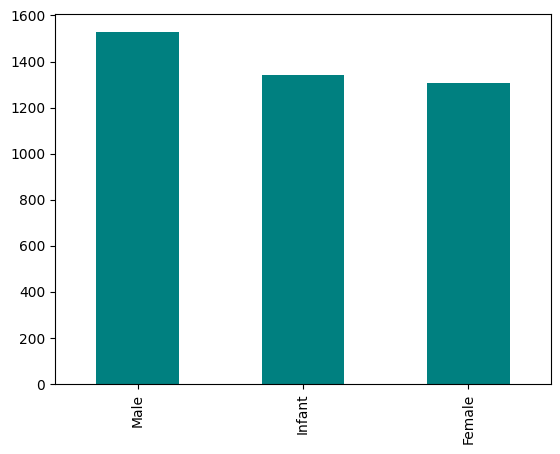

In [59]:
df_qualitative_summary['count'].plot(
    kind='bar',
    color='teal'
)

array([[<Axes: title={'center': 'lenght [mm]'}>,
        <Axes: title={'center': 'diameter [mm]'}>],
       [<Axes: title={'center': 'height [mm]'}>,
        <Axes: title={'center': 'whole weight [g]'}>],
       [<Axes: title={'center': 'shucked weight [g]'}>,
        <Axes: title={'center': 'viscera weight [g]'}>],
       [<Axes: title={'center': 'shell weight [g]'}>,
        <Axes: title={'center': 'rings'}>]], dtype=object)

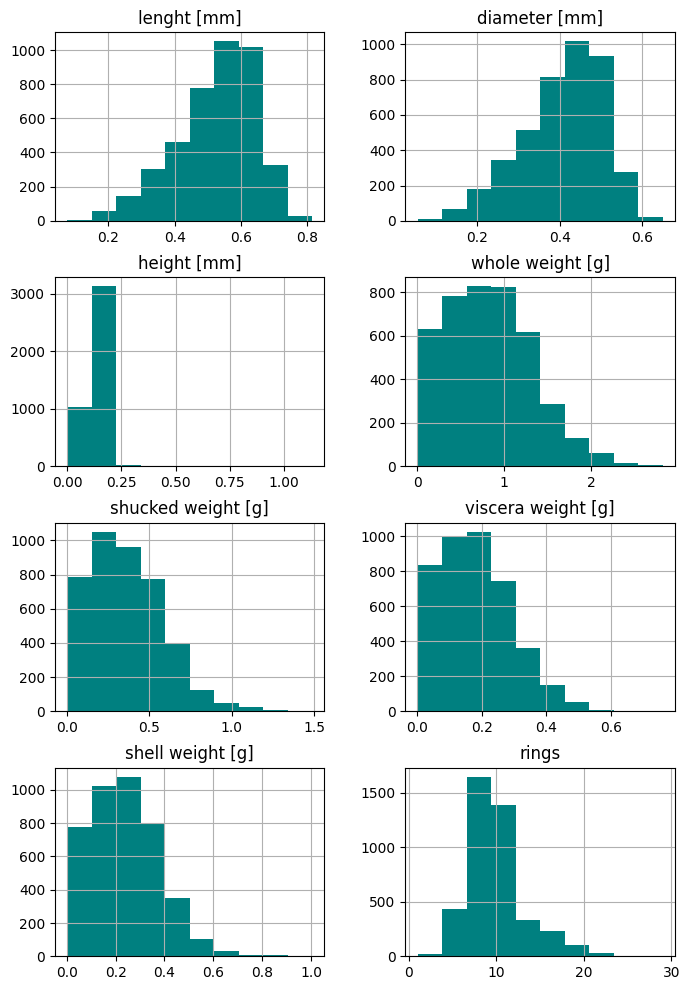

In [58]:
quantitative_values.hist(
    layout=(4, 2),
    figsize=(8, 12),
    color='teal'
)

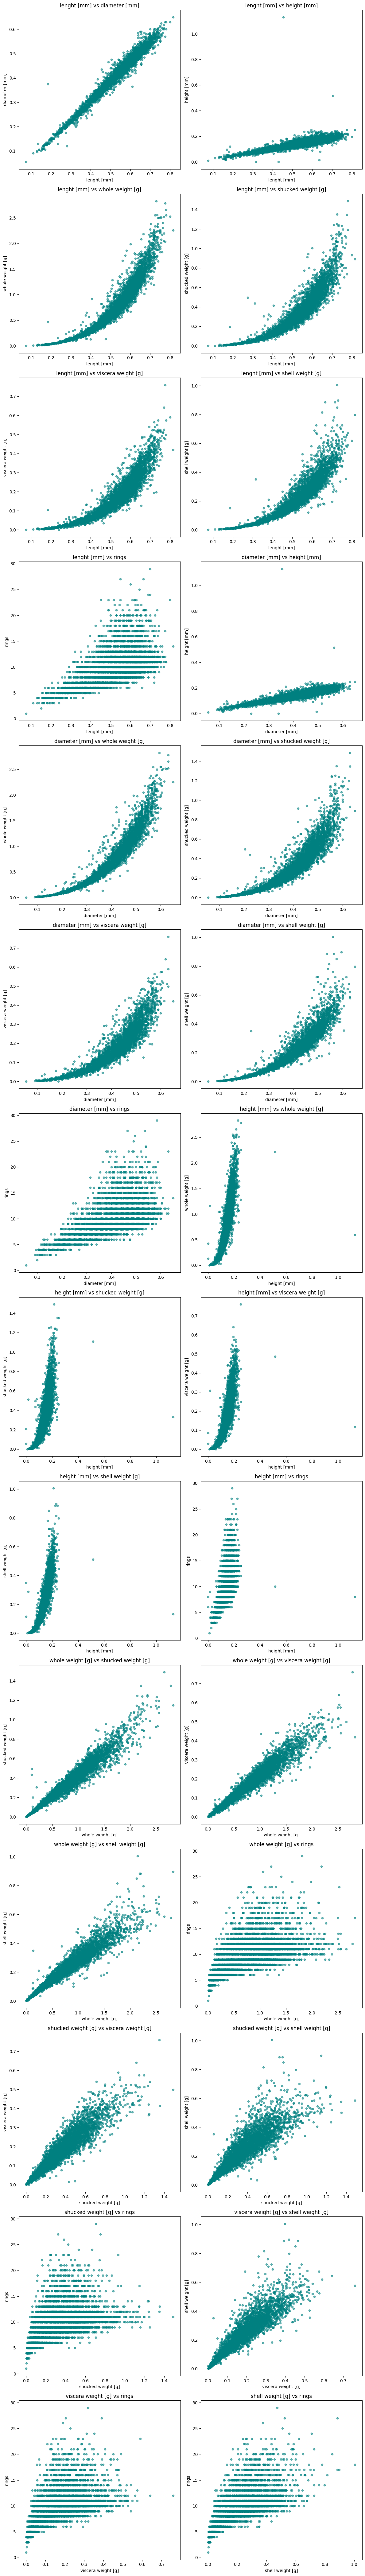

In [53]:
all_quantitative_pairs = (
    list(
        combinations(quantitative_values, 2)
))

fig, axes = plt.subplots(14, 2, figsize=(12, 84))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(all_quantitative_pairs):
    quantitative_values.plot.scatter(
        x=x_var,
        y=y_var,
        ax=axes[i],
        alpha=0.6,
        color='teal',
        title=f'{x_var} vs {y_var}'
    )

plt.tight_layout()
plt.show()

In [54]:
corr_matrix = quantitative_values.corr().round(2)

linear_correlation_matrix_table = pd.DataFrame(
    corr_matrix
)

linear_correlation_matrix_table

,lenght [mm],diameter [mm],height [mm],whole weight [g],shucked weight [g],viscera weight [g],shell weight [g],rings
lenght [mm],1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
diameter [mm],0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
height [mm],0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
whole weight [g],0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
shucked weight [g],0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
viscera weight [g],0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
shell weight [g],0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


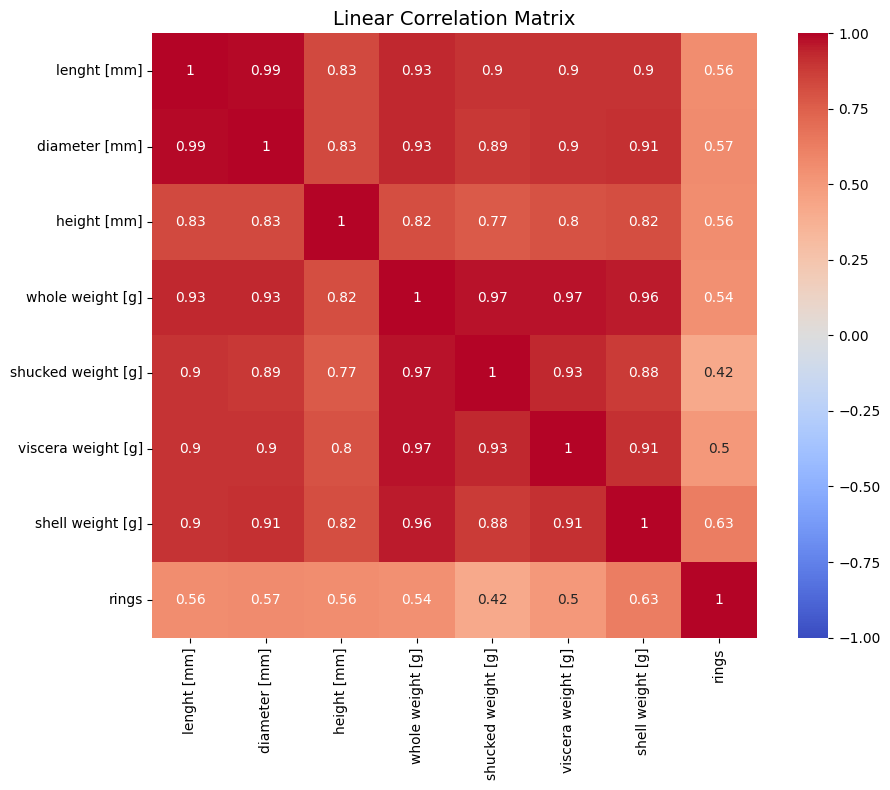

In [55]:
plt.figure(figsize=(10, 8))
sbn.heatmap(
    linear_correlation_matrix_table,
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1, vmax=1,
    square=True
)
plt.title("Linear Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

Most strongly correlated variables: ('lenght [mm]', 'diameter [mm]')


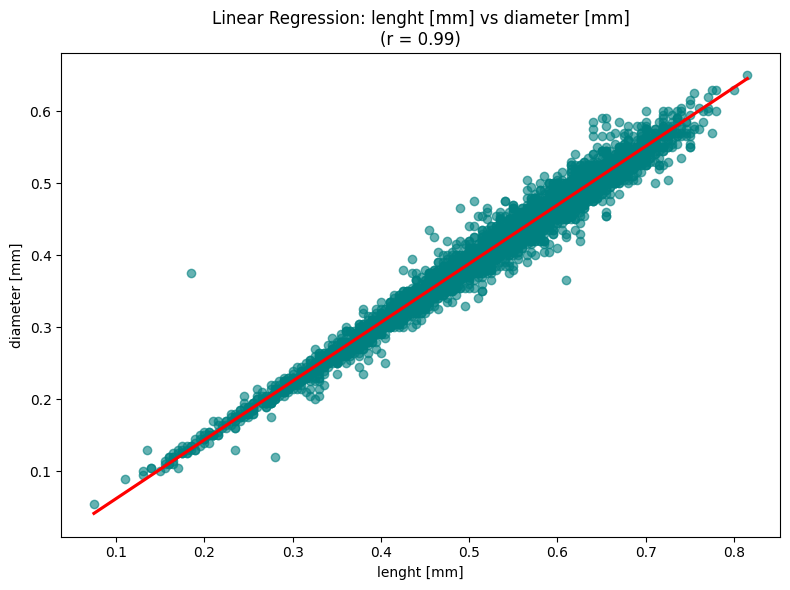

In [57]:
corr_matrix_abs = corr_matrix.abs()
np.fill_diagonal(corr_matrix_abs.values, 0)
max_pair = corr_matrix_abs.stack().idxmax()
print(f"Most strongly correlated variables: {max_pair}")

x_var, y_var = max_pair


plt.figure(figsize=(8, 6))
sbn.regplot(
    data=quantitative_values,
    x=x_var,
    y=y_var,
    scatter_kws={'alpha': 0.6, 'color': 'teal'},
    line_kws={'color': 'red'}
)
plt.title(f'Linear Regression: {x_var} vs {y_var}\n(r = {corr_matrix.loc[x_var, y_var]:.2f})')
plt.tight_layout()
plt.show()